# TP3 - Pregunta 1: Detección Simple de Logo

## Objetivo
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas usando template matching, obteniendo **una detección del logo en cada imagen sin falsos positivos**.

## Metodología
- Utilizar template matching con múltiples escalas
- Aplicar preprocesamiento con filtros Canny
- Usar Non-Maximum Suppression (NMS) para eliminar detecciones redundantes
- Configurar umbrales para evitar falsos positivos

## 1. Importación de librerías y configuración

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# Importar módulos locales
from template_matching_lib.config import crear_config_dict
from template_matching_lib.preprocessing import cargar_template
from template_matching_lib.utils import obtener_imagenes, procesar_imagen, crear_directorio_resultados

print("Librerías importadas correctamente")
print(f"OpenCV version: {cv2.__version__}")

Librerías importadas correctamente
OpenCV version: 4.12.0


## 2. Configuración del experimento

In [2]:
# Crear configuración para detección simple
config = crear_config_dict('single')

print("Configuración para detección simple:")
print(f"- Directorio de imágenes: {config['PATH_IMAGENES']}")
print(f"- Directorio de template: {config['PATH_TEMPLATE']}")
print(f"- Rango de escalas: {config['ESCALA_MIN']} a {config['ESCALA_MAX']}")
print(f"- Paso de escala: {config['PASO_ESCALA']}")
print(f"- Umbral de detección: {config['UMBRAL_SIMPLE_DETECCION']}")
print(f"- Umbral IOU para NMS: {config['UMBRAL_IOU_NMS']}")
print(f"- Directorio de resultados: {config['CARPETA_RESULTADOS']}")

# Crear directorio de resultados
crear_directorio_resultados(config)

Configuración para detección simple:
- Directorio de imágenes: TP3/images/
- Directorio de template: TP3/template/
- Rango de escalas: 0.4 a 3.0
- Paso de escala: 0.05
- Umbral de detección: 0.04
- Umbral IOU para NMS: 0.04
- Directorio de resultados: resultados_canny


## 3. Carga del template

Cargando template desde: TP3/template/pattern.png
Template cargado exitosamente
Dimensiones del template original: (175, 400, 3)
Dimensiones del template con Canny: (175, 400)


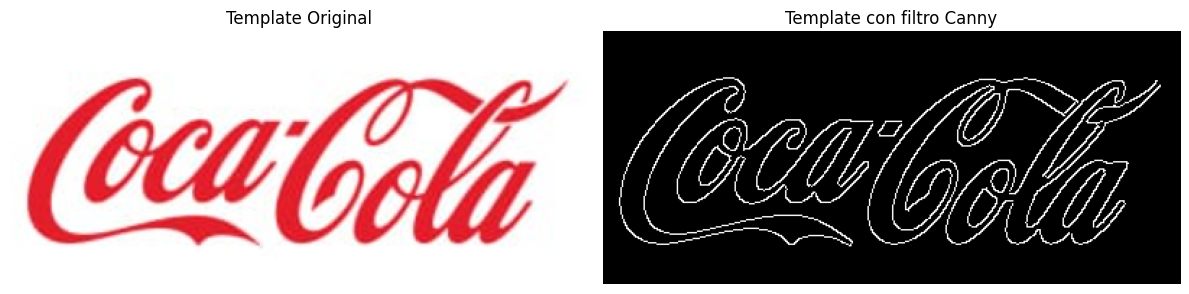

In [3]:
# Cargar y mostrar el template
template_path = f"{config['PATH_TEMPLATE']}pattern.png"
print(f"Cargando template desde: {template_path}")

# Cargar template original
template_original = cv2.imread(template_path)
if template_original is None:
    raise ValueError(f"No se pudo cargar el template desde {template_path}")

# Cargar template procesado
template_canny = cargar_template(template_path, config)

print(f"Template cargado exitosamente")
print(f"Dimensiones del template original: {template_original.shape}")
print(f"Dimensiones del template con Canny: {template_canny.shape}")

# Visualizar el template
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(cv2.cvtColor(template_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Template Original')
axes[0].axis('off')

axes[1].imshow(template_canny, cmap='gray')
axes[1].set_title('Template con filtro Canny')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Crear diccionario para compatibilidad con el resto del código
template_data = {
    'template': template_original,
    'template_canny': template_canny
}

## 4. Obtener lista de imágenes

In [4]:
# Obtener lista de imágenes a procesar
imagenes = obtener_imagenes(config=config)

print(f"Se encontraron {len(imagenes)} imágenes para procesar:")
for i, img in enumerate(imagenes, 1):
    nombre = os.path.basename(img)
    print(f"{i:2d}. {nombre}")

if not imagenes:
    print("ERROR: No se encontraron imágenes para procesar.")
    print(f"Verificar que exista el directorio: {config['PATH_IMAGENES']}")

Se encontraron 5 imágenes para procesar:
 1. coca_logo_1.png
 2. coca_logo_2.png
 3. logo_1.png
 4. coca_retro_1.png
 5. coca_retro_2.png


## 5. Procesamiento de imágenes

In [5]:
# Procesar cada imagen
resultados = {}

if imagenes:
    print("Iniciando procesamiento de imágenes...\n")
    
    for i, ruta_imagen in enumerate(tqdm(imagenes, desc="Procesando imágenes"), 1):
        nombre = os.path.basename(ruta_imagen)
        print(f"\nProcesando imagen {i}/{len(imagenes)}: {nombre}")
        
        try:
            # Procesar imagen (usar solo el template procesado con Canny)
            detecciones = procesar_imagen(ruta_imagen, template_canny, config)
            resultados[nombre] = detecciones
            
            print(f"  ✓ Completado: {len(detecciones)} detección(es) encontrada(s)")
            
        except Exception as e:
            print(f"  ✗ Error procesando {nombre}: {str(e)}")
            resultados[nombre] = []
    
    print("\n" + "="*50)
    print("RESUMEN DE RESULTADOS")
    print("="*50)
else:
    print("No hay imágenes para procesar.")

Iniciando procesamiento de imágenes...



Procesando imágenes:   0%|          | 0/5 [00:00<?, ?it/s]


Procesando imagen 1/5: coca_logo_1.png


Procesando escalas: 100%|██████████| 53/53 [00:00<00:00, 7883.19it/s]

Procesando imágenes:  20%|██        | 1/5 [00:04<00:18,  4.51s/it]

  ✓ Completado: 1 detección(es) encontrada(s)

Procesando imagen 2/5: coca_logo_2.png


Procesando imágenes:  40%|████      | 2/5 [00:09<00:13,  4.62s/it]

  ✓ Completado: 3 detección(es) encontrada(s)

Procesando imagen 3/5: logo_1.png


Procesando imágenes:  60%|██████    | 3/5 [00:15<00:10,  5.34s/it]

  ✓ Completado: 1 detección(es) encontrada(s)

Procesando imagen 4/5: coca_retro_1.png


Procesando imágenes:  80%|████████  | 4/5 [00:20<00:05,  5.31s/it]

  ✓ Completado: 1 detección(es) encontrada(s)

Procesando imagen 5/5: coca_retro_2.png


Procesando imágenes: 100%|██████████| 5/5 [00:26<00:00,  5.37s/it]

  ✓ Completado: 1 detección(es) encontrada(s)

RESUMEN DE RESULTADOS


## 6. Visualización de algunos resultados

Mostrando 6 resultados de detección:


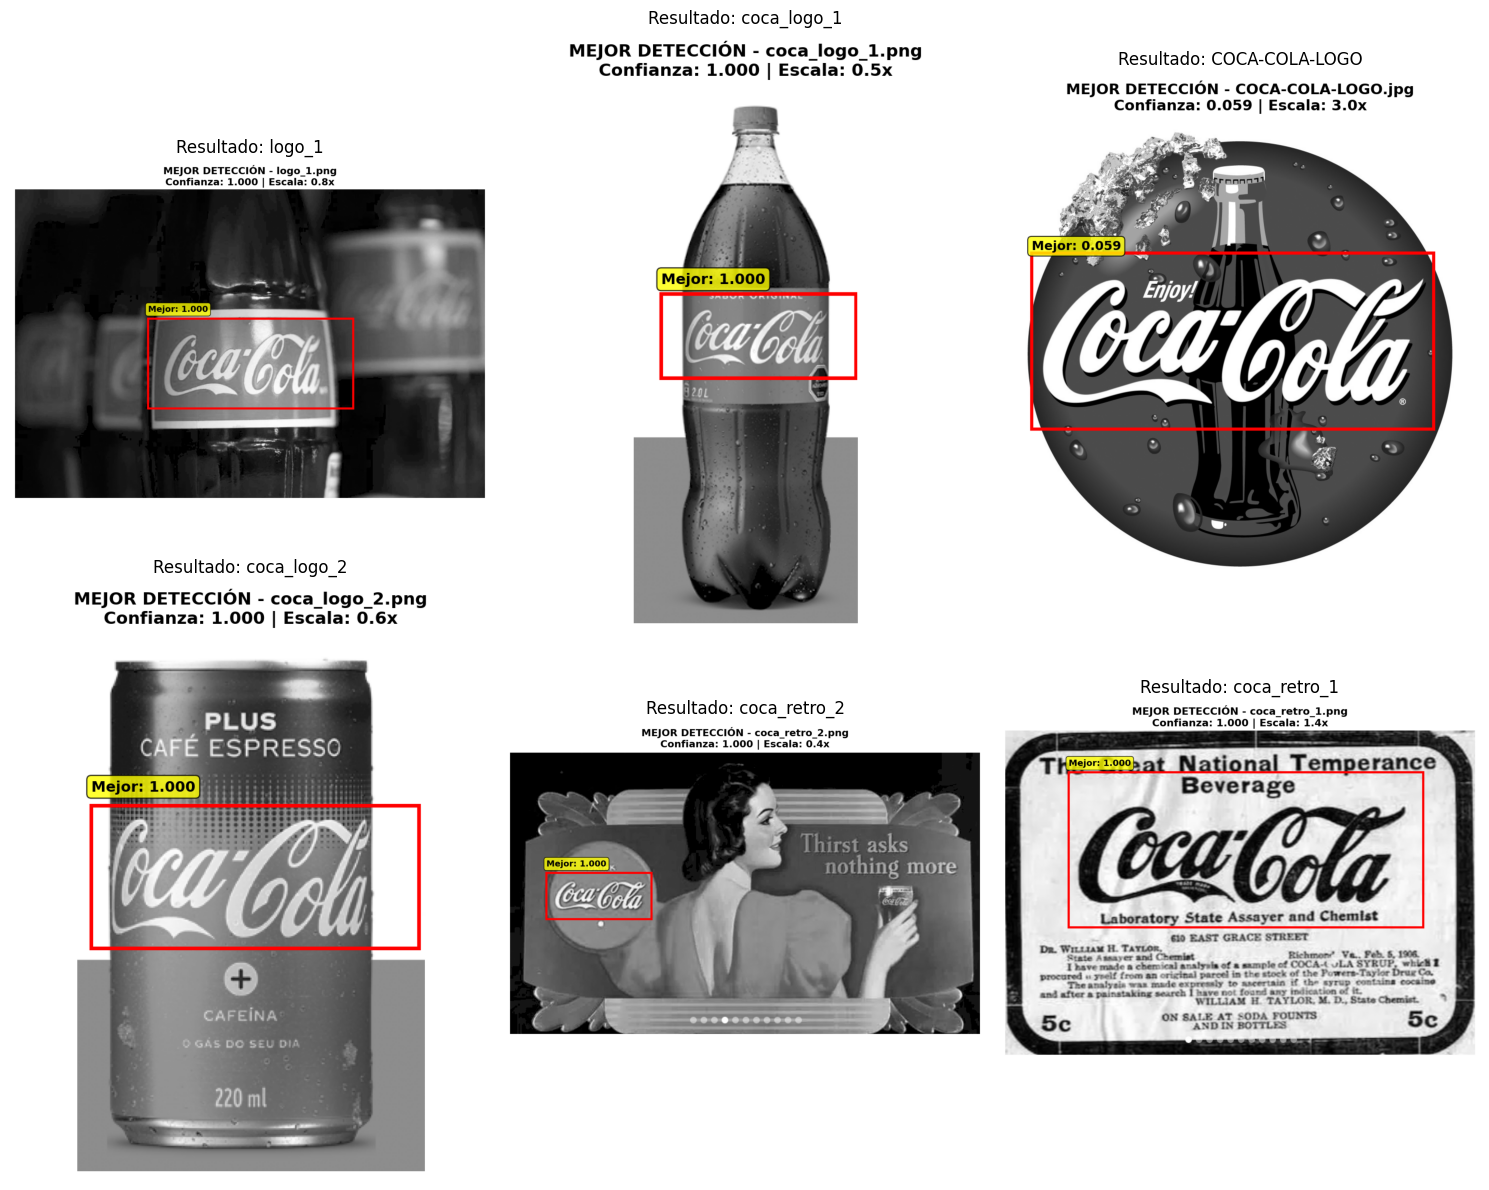

In [7]:
# Mostrar algunas imágenes de resultado si existen
import glob

directorio_resultados = config['CARPETA_RESULTADOS']
if os.path.exists(directorio_resultados):
    # Buscar imágenes de mejor detección
    imagenes_resultado = glob.glob(os.path.join(directorio_resultados, '*_03_mejor_deteccion.png'))
    
    if imagenes_resultado:
        print(f"Mostrando { len(imagenes_resultado)} resultados de detección:")
        
        # Mostrar hasta 4 resultados
        num_mostrar =  len(imagenes_resultado)
        fig, axes = plt.subplots(2, 3, figsize=(15, 12))
        axes = axes.flatten()
        
        for i in range(num_mostrar):
            img_resultado = cv2.imread(imagenes_resultado[i])
            img_resultado_rgb = cv2.cvtColor(img_resultado, cv2.COLOR_BGR2RGB)
            
            axes[i].imshow(img_resultado_rgb)
            nombre_archivo = os.path.basename(imagenes_resultado[i])
            axes[i].set_title(f'Resultado: {nombre_archivo.replace("_03_mejor_deteccion.png", "")}')
            axes[i].axis('off')
        
        # Ocultar ejes no utilizados
        for i in range(num_mostrar, 4):
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron imágenes de resultado para mostrar.")
else:
    print(f"Directorio de resultados no encontrado: {directorio_resultados}")

## Conclusiones

En esta primera parte del TP3 se implementó un algoritmo de detección simple de logos usando:

1. **Template matching multiescala**: Para detectar el logo a diferentes tamaños
2. **Preprocesamiento con Canny**: Para mejorar la detección de bordes
3. **Non-Maximum Suppression**: Para eliminar detecciones redundantes
4. **Configuración de umbrales**: Para minimizar falsos positivos